# Mastering SQL: Sakila Database

Introduction:
SQL is a powerful language used for managing, querying, and analyzing databases. It plays a crucial role in various industries, such as data science, web development, and business intelligence. In this blog post, we’ll explore a set of SQL questions and provide you with the correct answers and explanations to help you master this essential skill.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things such as films, actors, film-actor relationships, and a central inventory table that connects movies, stores, and rentals. Below is the Entity Relationship Diagram of the Sakila database.

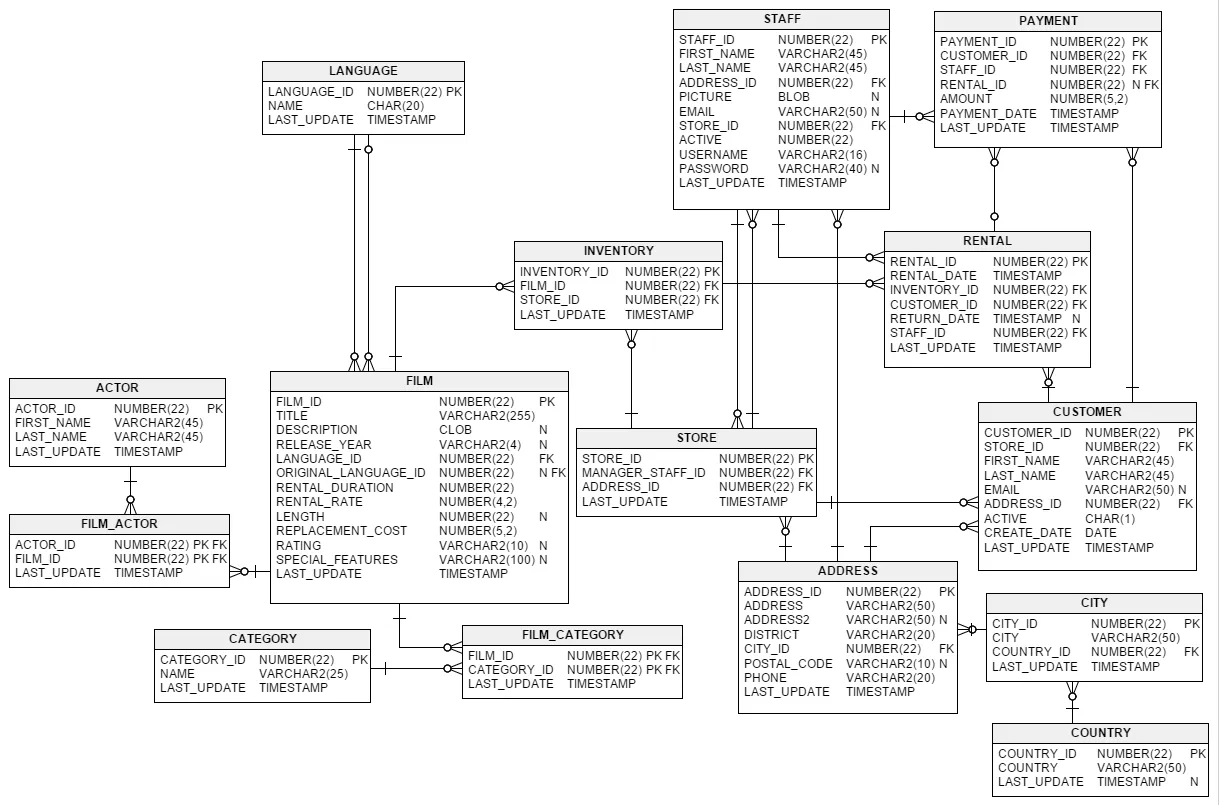



### Busiest Actor
Write a query to find the full name of the actor who has acted in the maximum number of movies.

In [ ]:
SELECT CONCAT(first_name, " ", last_name) AS Full_name
FROM actor
LEFT JOIN film_actor USING(ACTOR_ID)
GROUP BY Full_Name
ORDER BY COUNT(film_id) DESC
LIMIT 1;

This query uses a LEFT JOIN to combine the ACTOR and FILM_ACTOR tables, counting the number of movies each actor has acted in. It then orders the result in descending order and limits the output to the first result, which is the actor who has acted in the maximum number of movies.

Third most Busy Actor
Write a query to find the full name of the actor who has acted in the third most number of movies.

In [ ]:
SELECT CONCAT(first_name, " ", last_name) AS Full_name
FROM actor
LEFT JOIN film_actor USING(ACTOR_ID)
GROUP BY Full_Name
ORDER BY COUNT(film_id) DESC
LIMIT 2, 1;

This query is similar to the previous one but uses the LIMIT clause with offset 2 and limit 1 to retrieve the third most busy actor.

### Highest Grossing Film
Write a query to find the film which grossed the highest revenue for the video renting organization.

In [ ]:
SELECT Title
FROM film
INNER JOIN inventory USING(FILM_ID)
INNER JOIN rental USING(INVENTORY_ID)
INNER JOIN payment USING(RENTAL_ID)
GROUP BY Title
ORDER BY SUM(AMOUNT)
LIMIT 1;

This query joins the FILM, inventory, RENTAL, and PAYMENT tables, grouping the results by film title and calculating the total revenue (SUM(AMOUNT)). It then orders the results in ascending order and limits the output to the first result, which is the highest-grossing film.

### Film-obsessed City
Write a query to find the city which generated the maximum revenue for the organization.

In [ ]:
SELECT City
FROM city
INNER JOIN address USING(CITY_ID)
INNER JOIN customer USING(ADDRESS_ID)
INNER JOIN payment USING(CUSTOMER_ID)
GROUP BY City
ORDER BY SUM(AMOUNT) DESC
LIMIT 1;

This query joins the CITY, address, CUSTOMER, and PAYMENT tables, grouping the results by city and calculating the total revenue (SUM(AMOUNT)). It then orders the results in descending order and limits the output to the first result, which is the city that generated the maximum revenue.

### Analysis of Movie Categories
Write a query to find out how many times a particular movie category is rented. Arrange these categories in the decreasing order of the number of times they are rented.

In [ ]:
SELECT Name, COUNT(Name) AS Rental_count
FROM category
INNER JOIN film_category USING(CATEGORY_ID)
INNER JOIN film USING(FILM_ID)
INNER JOIN inventory USING (film_id)
INNER JOIN rental USING (inventory_id)
GROUP BY Name
ORDER BY Rental_count DESC;

This query joins the category, film_category, FILM, inventory, and rental tables, counting the number of times each movie category is rented. It then orders the categories in descending order of rental count.

### Science Fiction Enthusiasts
Write a query to find the full names of customers who have rented sci-fi movies more than 2 times. Arrange these names in alphabetical order.

In [ ]:
SELECT CONCAT(FIRST_NAME, " ", LAST_NAME) AS Customer_name
FROM category
INNER JOIN film_category USING(CATEGORY_ID)
INNER JOIN film USING(FILM_ID)
INNER JOIN inventory USING (film_id)
INNER JOIN rental USING(INVENTORY_ID)
INNER JOIN customer USING(CUSTOMER_ID)
WHERE Name = "sci-fi"
GROUP BY Customer_name
HAVING COUNT(RENTAL_ID) > 2
ORDER BY Customer_name;

This query joins the category, film_category, FILM, inventory, RENTAL, and CUSTOMER tables, filtering for sci-fi movies and customers who have rented them more than 2 times. It then orders the customer names alphabetically.

### Movie Fans from Arlington

Write a query to find the full names of those customers who have rented at least one movie and belong to the city Arlington.

In [ ]:
SELECT CONCAT(FIRST_NAME, " ", LAST_NAME) AS Customer_name
FROM customer
INNER JOIN rental USING(Customer_id)
INNER JOIN address USING(ADDRESS_ID)
INNER JOIN city USING(CITY_ID)
WHERE City = "Arlington"
GROUP BY Customer_name
HAVING COUNT(rental_id) >= 1;

 This query joins the customer, Rental, address, and CITY tables, filtering for customers from Arlington who have rented at least one movie. It then selects their full names and orders the result.

### Country-wise Analysis of Movies

Write a query to find the number of movies rented across each country. Display only those countries where at least one movie was rented. Arrange these countries in alphabetical order.

In [ ]:
SELECT country, COUNT(rental_id) AS Rental_count
FROM country
INNER JOIN city USING(COUNTRY_ID)
INNER JOIN address USING(CITY_ID)
INNER JOIN customer USING(ADDRESS_ID)
INNER JOIN rental USING(CUSTOMER_ID)
GROUP BY country
ORDER BY country;

This query joins the country, city, ADDRESS, CUSTOMER, and RENTAL tables, counting the number of movies rented in each country. It then filters out countries with no rentals and orders the result alphabetically.

### Conclusion: 

SQL is a fundamental skill for anyone working with databases and data analysis. These SQL questions and explanations provide insights into various aspects of SQL, from basic commands to complex queries. Practice is essential to master SQL, so keep honing your skills by working on real-world database problems and challenges.

### Thanks

https://medium.com/@nitin.data1997/mastering-sql-sakila-database-4794a50864ed

https://blog.jetbrains.com/datalore/2022/02/14/how-to-run-sql-from-jupyter-notebook-two-easy-ways/

